In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),
                                  feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[
         ['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
         if x[1]>0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [9]:
def get_human_dataset( ):
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/features.txt',sep='\s+',
    header=None,names=['column_index','column_name'])    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv("C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/train/x_train.txt",sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/test/x_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [17]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns

# SVC


--- SVM Classifier ---
0.9521547336274178


<Axes: title={'center': 'SVM Confusion Matrix'}>

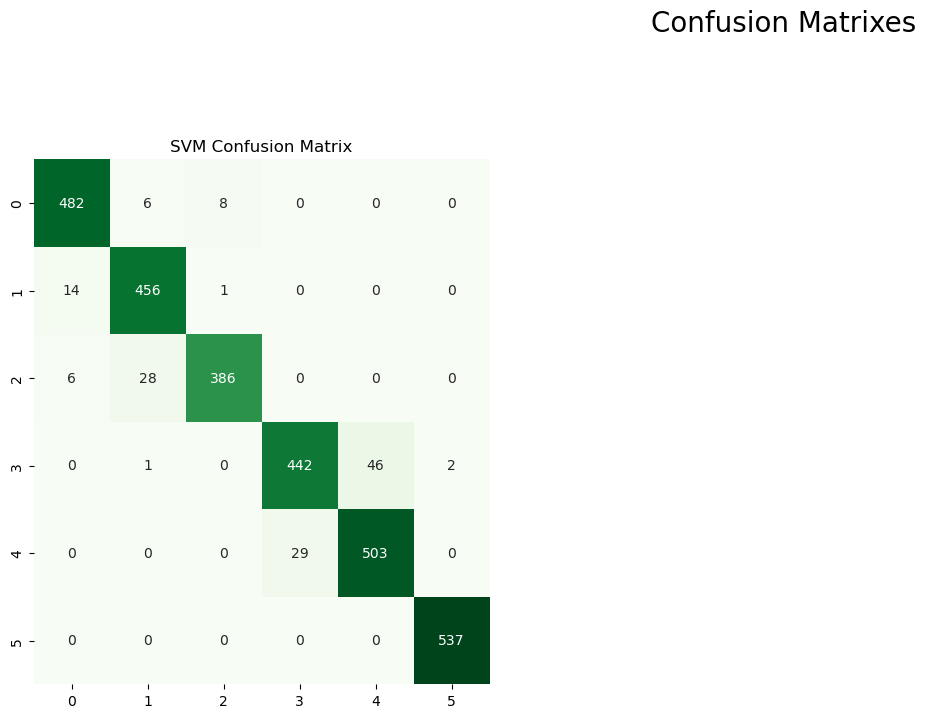

In [23]:

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
#print(confusion_matrix(y_test, pred_svm))

cm_svm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

# Random Forest


--- Radom Forest ---
0.9233118425517476


<Axes: title={'center': 'Random Forest Confusion Matrix'}>

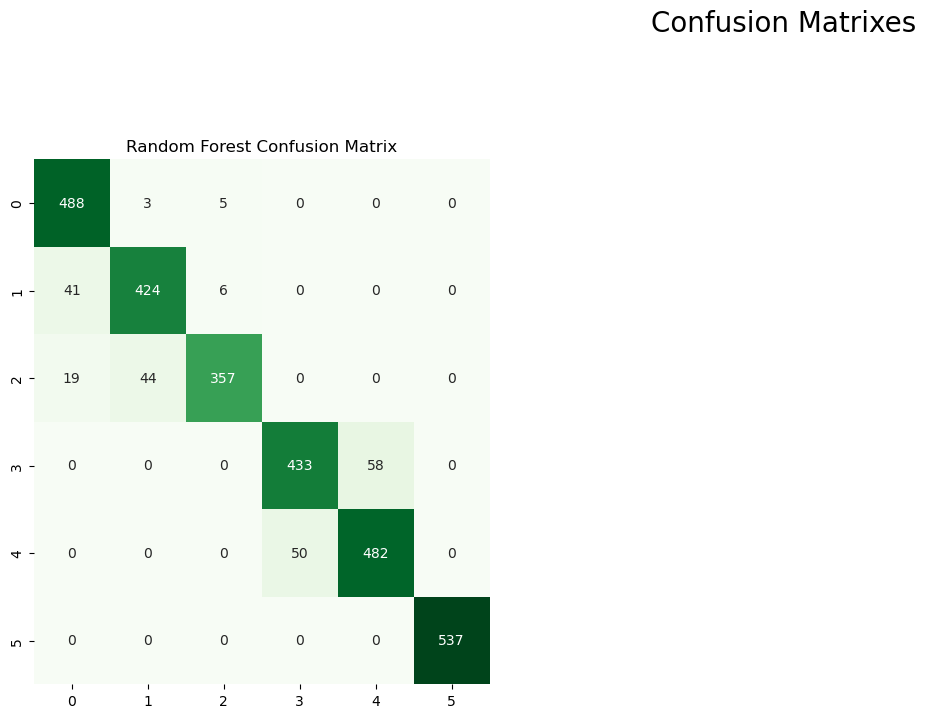

In [24]:

warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred_rf = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred_rf))
#print (confusion_matrix(y_test, pred_rf))

cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")

# LogisticRegression


--- Logistic Regression Classifier ---
0.9538513742789277


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

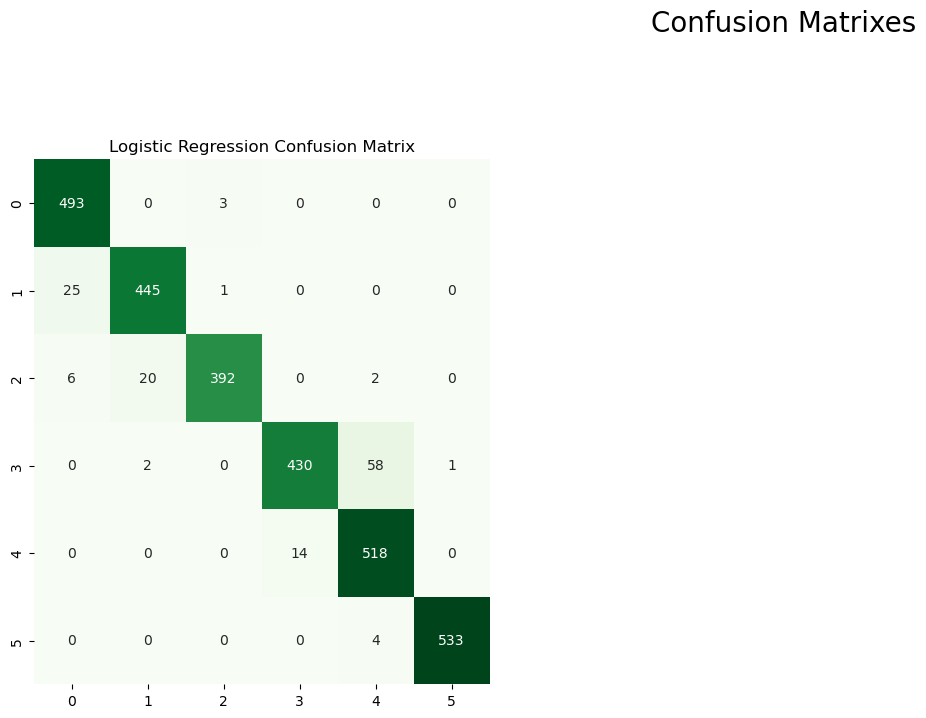

In [28]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#print (confusion_matrix(y_test, pred_lr))

cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

# DecisionTreeClassifier


--- Decision Tree Classifier ---
0.8544282321004412
[[440  36  20   0   0   0]
 [ 63 370  38   0   0   0]
 [ 19  56 345   0   0   0]
 [  0   0   0 370 121   0]
 [  0   0   0  76 456   0]
 [  0   0   0   0   0 537]]


<Axes: title={'center': 'Decision Tree Confusion Matrix'}>

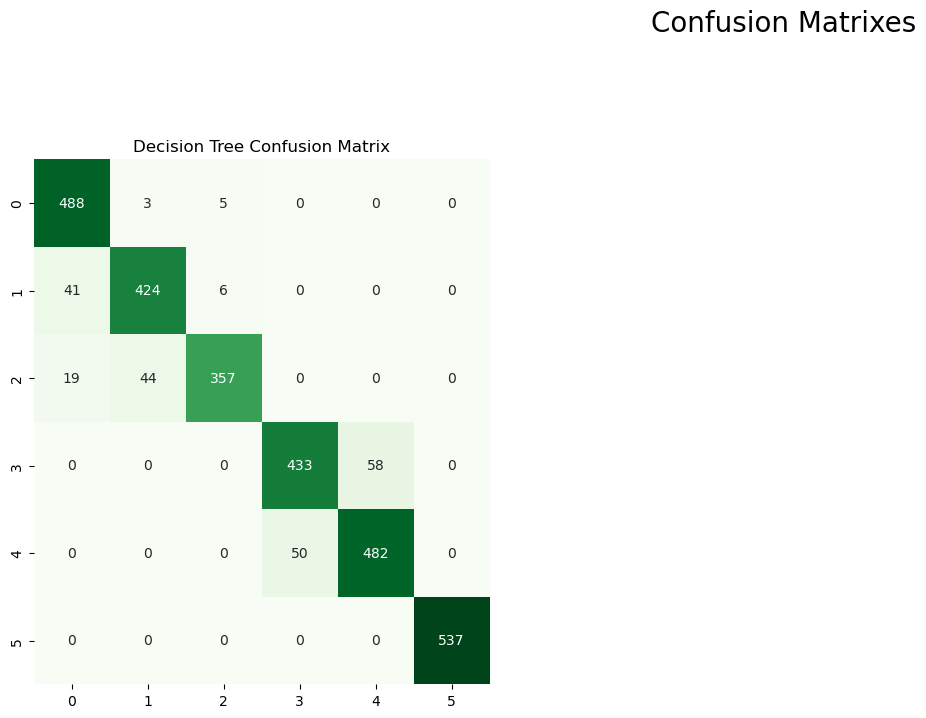

In [29]:


clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_scaled, y_train)

pred_lr = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

cm_dt = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")